# Calculations
Here we estimate the costs of the ring signatures proposed in [ia.cr/2024/1185](https://ia.cr/2024/1185) for different choices of parameters.

## Erebor
Here we perform several estimate for the parameter and timings of Erebor.
We take as input:
* the prime `p` used (and $f$ maximal such that $2^f | (p^2 -1)$)
* the costs of KeyGen, Sign and Verification

In [2]:
def erebor_estimates(p, f, keygen_cost, sign_cost, ver_cost):
    logp = log(p,2).numerical_approx()
    loglogp = log(log(p,2),2).numerical_approx()
    # short case, actually we could fix e = 1000
    e_short = ceil(15/4 * logp + 6*loglogp)
    cost = e_short + 4*(ceil(e_short/f) - 1)
    print(f'Short version has e = {e_short}')
    print(f'Sig size  : lam bits + N {ceil(cost/8)} B')
    print(f'Sign time : (N - 1) {ver_cost} + {keygen_cost + sign_cost} MC')
    print(f'Ver time  : N {ver_cost} MC\n')

    e_full = ceil(9/2 * logp + 3*128/2+ 3*loglogp)
    cost = e_full + 4*(ceil(e_full/f) - 1)
    print(f'Full version not rounded has e = {e_full}')
    print(f'Sig size  : lam bits + N {ceil(cost/8)} B')
    # this rounding is necessary to add some room of error
    e_full = ceil(e_full/f)*f
    cost = e_full + 4*(ceil(e_full/f) - 1)
    print(f'Full version rounded has e = {e_full}')
    print(f'Sig size  : lam bits + N {ceil(cost/8)} B')
    for N in [2,4,8]:
        print(f'For N = {N} sig size is {(N * cost/(8*1024)).numerical_approx():.4f}')
    ratio = 1.4 #e_full/e_short
    sign_cost, ver_cost = ceil(ratio*sign_cost), ceil(ratio*ver_cost)
    print(f'Sign time : (N - 1) {ver_cost} + {keygen_cost + sign_cost} MC')
    print(f'Ver time  : N {ver_cost} MC')
    


We start for the case for `p3923` with $f=65$ using [ia.cr/2022/234](https://eprint.iacr.org/2022/234.pdf) estimates. 

In [3]:
p3923 = 2**65 * 5**2  * 7 * 11 * 19 * 29**2 * 37**2  * 47 * 197 * 263 * 281 * 461 * 521 * 3923 * 62731 * 96362257 * 3924006112952623 - 1
print(factor(p3923-1))
print()
f = 65
erebor_estimates(p = p3923, f = f, keygen_cost = 421, sign_cost = 1987, ver_cost = 30)

2 * 3^65 * 13 * 17 * 43 * 79 * 157 * 239 * 271 * 283 * 307 * 563 * 599 * 607 * 619 * 743 * 827 * 941 * 2357 * 10069

Short version has e = 1000
Sig size  : lam bits + N 133 B
Sign time : (N - 1) 30 + 2408 MC
Ver time  : N 30 MC

Full version not rounded has e = 1358
Sig size  : lam bits + N 180 B
Full version rounded has e = 1365
Sig size  : lam bits + N 181 B
For N = 2 sig size is 0.3528
For N = 4 sig size is 0.7056
For N = 8 sig size is 1.4111
Sign time : (N - 1) 42 + 3203 MC
Ver time  : N 42 MC


Case for `p6983`, with $f=31$, from the implementation.

In [5]:
from code.parameters import p6983
erebor_estimates(p = p6983['p'], f = 31, keygen_cost = 1828, sign_cost = 7020 , ver_cost = 143)

Short version has e = 1006
Sig size  : lam bits + N 142 B
Sign time : (N - 1) 143 + 8848 MC
Ver time  : N 143 MC

Full version not rounded has e = 1366
Sig size  : lam bits + N 193 B
Full version rounded has e = 1395
Sig size  : lam bits + N 197 B
For N = 2 sig size is 0.3835
For N = 4 sig size is 0.7671
For N = 8 sig size is 1.5342
Sign time : (N - 1) 201 + 11656 MC
Ver time  : N 201 MC


We can consider the procedures used in [ia.cr/2024/778](https://eprint.iacr.org/2024/778.pdf) with $p = 2^{247}*79 - 1$. We estimate the timings using the ones provided in the paper, derived from an implementation in the Julia language with its computer algebra package Nemo.

In [6]:
erebor_estimates(p = 2**247 * 79 - 1, f = 247, keygen_cost = 4813, sign_cost = 8103 , ver_cost = 202)

Short version has e = 998
Sig size  : lam bits + N 127 B
Sign time : (N - 1) 202 + 12916 MC
Ver time  : N 202 MC

Full version not rounded has e = 1356
Sig size  : lam bits + N 172 B
Full version rounded has e = 1482
Sig size  : lam bits + N 188 B
For N = 2 sig size is 0.3667
For N = 4 sig size is 0.7334
For N = 8 sig size is 1.4668
Sign time : (N - 1) 283 + 16158 MC
Ver time  : N 283 MC


*Comparison* with other ring signatures of the parameters obtained from `p3923`.

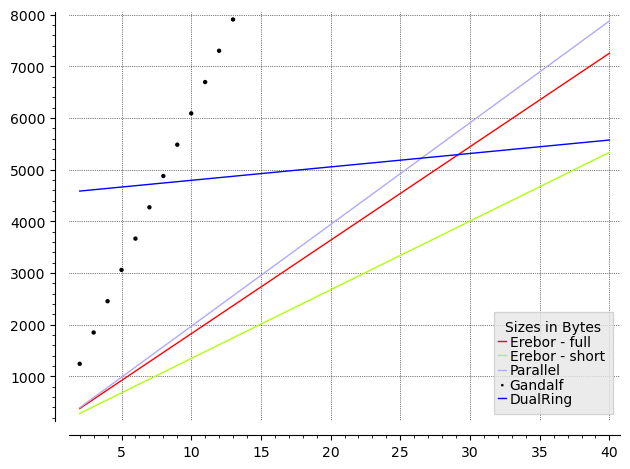

In [7]:
max_N = 40
sig_size_full = 181
t = var('t')
G = plot(16  + t*sig_size_full, (t,2,max_N), gridlines=True, rgbcolor = '#ff0000', legend_label=f'Erebor - full')

G += plot(16  + t*133, (t,2,max_N), rgbcolor = '#b0ff0a', legend_label=f'Erebor - short')

G += plot(t*(sig_size_full + 16), (t,2,max_N), rgbcolor = '#b0aafa', legend_label=f'Parallel')

gandalf = [(2, 1244), (3, 1850), (4, 2456), (5, 3062), (6, 3668), (7, 4274), (8, 4880), (9, 5486), (10, 6092), (11, 6698), (12, 7304), (13, 7910)]#, (14, 8516), (15, 9122), (16, 9728), (17, 10334), (18, 10940), (19, 11546), (20, 12152), (21, 12758), (22, 13364), (23, 13970), (24, 14576), (25, 15182), (26, 15788)]

G += list_plot(gandalf, rgbcolor = '#000000', legend_label=f'Gandalf')

dual_ring = [(N,4536 + 26*N) for N in [2..max_N]]
G += plot(4536 + 26*t, (t,2,max_N), rgbcolor = '#0000ff', legend_label=f'DualRing')

G.legend(True)
G.set_legend_options(back_color=(0.9,0.9,0.9), shadow=False, title = f'Sizes in Bytes', loc = 'lower right')
G


## Durian

In [8]:
def _u(num):
    # Convert the number to binary
    binary_str = bin(num)[2:]  # [2:] to remove '0b' prefix from binary representation
    # Count the occurrences of '1' in the binary string
    count = binary_str.count('1')
    return count

def N_seed(t,w,max = True):
    if t < w:
        raise ValueError(f'Invalid input for seed cost estimator {t =}, {w =}')
    elif not max:
        return ceil(w * log(t / w, 2))
    elif max:
        return ceil(w * log(t / w, 2)) + _u(t) - 1

In [9]:
p = 5 * 2**248 - 1
lam = 128
def durian_sizes(M, w, p = p, lam = lam, out = True):
    num_rounds = w + 1
    # self.num_rounds = self.w*2
    while ( binomial(num_rounds,w) < 2**lam ) and num_rounds < 100000:
        num_rounds += 1
    if out:
        print(f'for {M} users and weigth {w} we use {num_rounds} rounds')
    cost1 = ceil(log(p,2) + ceil(log(M,2))*2*lam + lam )
    cost0 = lam

    cost = w * cost1 + N_seed(num_rounds, w, max = True) * cost0
    # cost = w * cost1 + (num_rounds - w) * cost0 
    if out:
        to_bytes(cost)
    return ceil(cost/8)

def to_bytes(cost):
    print(f'costs = {cost} bits, {ceil(cost/8)} Bytes, {(cost/(8*1024)).numerical_approx(16)} KB')

durian_sizes(2, w = 25)
durian_sizes(8, w = 35)
durian_sizes(2**10, w = 23)
durian_sizes(2**5, w = 23)

for 2 users and weigth 25 we use 366 rounds
costs = 28931 bits, 3617 Bytes, 3.532 KB
for 8 users and weigth 35 we use 193 rounds
costs = 51537 bits, 6443 Bytes, 6.291 KB
for 1024 users and weigth 23 we use 458 rounds
costs = 80909 bits, 10114 Bytes, 9.876 KB
for 32 users and weigth 23 we use 458 rounds
costs = 51469 bits, 6434 Bytes, 6.283 KB


6434

# Other stuff

In [ ]:
def size(x):
    return log(x,2).numerical_approx(24)